# Importing Libraries and Pre-Processing it to Train our model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import relativedelta
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Defining Functions

In [2]:
def diff_in_days(dt1, dt2):
    start_date = datetime.strptime(dt1, "%d-%m-%Y")
    end_date = datetime.strptime(dt2, "%d-%m-%Y")
    delta = relativedelta.relativedelta(end_date, start_date)
    return delta.years*12+delta.months*30+delta.days

In [3]:
def replace(x):
    if(x=='0 nonfemale'):
        return 1
    else:
        return 0

# 1. Pre-Processing the Given Data

## Importing Raw $Judge Clean$ Table

In [4]:
df = pd.read_csv('csv\\judges_clean.csv')

In [5]:
df1 = df.copy()
df1 = df1[df1['start_date'].notna()]
df1 = df1[df1['end_date'].notna()]
df1.head(3)

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016


In [6]:
df1['time_taken'] = df1.apply(lambda r: diff_in_days(r.start_date, r.end_date), axis=1)
df1.head(3)

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,time_taken
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,150
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,110
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,124


In [7]:
df1['gender'] = df1['female_judge'].apply(lambda x: replace(x))
df1.head(3)

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,time_taken,gender
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,150,1
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,110,1
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,124,1


In [8]:
df1 = df1.drop(['female_judge','start_date','end_date','ddl_judge_id'], axis = 1)
df1.head(3)

,state_code,dist_code,court_no,judge_position,time_taken,gender
0,1,1,1,chief judicial magistrate,150,1
1,1,1,1,chief judicial magistrate,110,1
2,1,1,1,chief judicial magistrate,124,1


# 2. Defining Our Model

## Transforming Text Values into Numerical Values

In [9]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'judge_position'.
df1['judge_position']= label_encoder.fit_transform(df1['judge_position'])

df1.head(3)

,state_code,dist_code,court_no,judge_position,time_taken,gender
0,1,1,1,193,150,1
1,1,1,1,193,110,1
2,1,1,1,193,124,1


## Splitting Our Data into a training and test dataset

In [10]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
accuracies = []

# 3. Trying Out Different Models

## i. Applying Logistic Regression

In [11]:
classifier = LogisticRegression()

# Training Our Model
classifier.fit(X_train,Y_train)

LogisticRegression()

In [12]:
lr_score = classifier.score(X_test,Y_test)
accuracies.append(lr_score)
print(lr_score)

0.6972111553784861


## ii. k-Nearest Neighbours KNN

In [13]:
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn_score = knn.score(X_test, Y_test)
accuracies.append(knn_score)
print(knn_score)

0.6750083001328021


## iii. Random Forest

In [15]:
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [16]:
rdmf_score = rdmf.score(X_test, Y_test)
accuracies.append(rdmf_score)
print(rdmf_score)

0.7044737715803453


## iv. Xg Boost

In [17]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [18]:
xgb_score = xgb.score(X_test, Y_test)
accuracies.append(xgb_score)
print(xgb_score)

0.731781208499336


In [19]:
Labels = ['Logistic Regression', 'KNN', 'Random Forest', 'Xgboost']

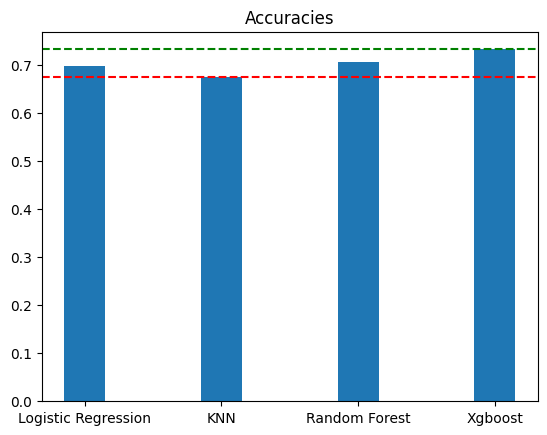

In [20]:
max_y=max(accuracies)
min_y=min(accuracies)
plt.bar(Labels, accuracies, 0.3)
plt.title('Accuracies')
plt.axhline(y=max_y, color='g', linestyle='--')
plt.axhline(y=min_y, color='r', linestyle='--')
plt.show()